In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as mno
#import sweetviz as sv

from sklearn.model_selection import train_test_split

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
vehicle = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Data/vehicle_data.parquet')
accident = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/Data/accident_data.parquet')

In [4]:
#vehicle.info()

In [5]:
#accident.info()

In [6]:
#mno.matrix(accident)

In [7]:
accident.dropna(subset=['Carriageway_Hazards', 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Road_Type', 'Special_Conditions_at_Site', 'Latitude', 'Longitude', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Time', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Physical_Facilities'], inplace=True)
accident['Weather_Conditions'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Class'].replace(np.NaN, 'Unknown', inplace=True)
accident['1st_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['2nd_Road_Class'].replace(np.NaN, 'Unknown', inplace=True)
accident['2nd_Road_Number'].replace(np.NaN, 'Unknown', inplace=True)
accident['LSOA_of_Accident_Location'].replace(np.NaN, 'Unknown', inplace=True)

In [8]:
#accident.info()

In [9]:
#mno.matrix(accident)

In [10]:
for column in accident.columns:
    print(column + ' : ' + str(len(accident[column].unique())))
    if(len(accident[column].unique()) < 100):
        print(column + ' : ' + str(accident[column].unique()))
    print('\n')

Accident_Index : 663339


1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unknown' 'A' 'Motorway' 'A(M)']


1st_Road_Number : 6540


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'Unknown' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 6934


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Did_Police_Officer_Attend_Scene_of_Accident : 3
Did_Police_Officer_Attend_Scene_of_Accident : [1. 2. 3.]


Junction_Control : 7
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Auto traffic sigl' 'Not at junction or within 20 metres']


Junction_Detail :

In [11]:
#vehicle.info()

In [12]:
#mno.matrix(vehicle)

In [13]:
vehicle.dropna(subset=['Vehicle_Location.Restricted_Lane'], inplace=True) 
vehicle['make'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['model'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Propulsion_Code'].replace(np.NaN, 'Unknown', inplace=True)
vehicle['Driver_IMD_Decile'].replace(np.NaN, 0, inplace=True)
vehicle['Age_of_Vehicle'].replace(np.NaN, -1, inplace=True)
vehicle['Engine_Capacity_.CC.'].replace(np.NaN, -1, inplace=True)
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175888 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [14]:
#mno.matrix(vehicle)

In [15]:
for column in vehicle.columns:
    print(column + ' : ' + str(len(vehicle[column].unique())))
    if(len(vehicle[column].unique()) < 100):
        print(column + ' : ' + str(vehicle[column].unique()))
    print('\n')

Accident_Index : 1488220


Age_Band_of_Driver : 12
Age_Band_of_Driver : ['26 - 35' '66 - 75' '36 - 45' '46 - 55' '21 - 25'
 'Data missing or out of range' '16 - 20' '56 - 65' 'Over 75' '11 - 15'
 '6 - 10' '0 - 5']


Age_of_Vehicle : 89
Age_of_Vehicle : [  3.  -1.   4.   1.  10.   2.  11.   6.   9.   5.  13.  15.   7.  12.
   8.  16.  14.  28.  41.  17.  37.  21.  27.  23.  20.  24.  18.  25.
  38.  40.  39.  26.  42.  36.  19.  22.  30.  34.  32.  29.  31.  33.
  45.  35.  49.  43.  48.  71.  47.  52.  46.  44.  53.  51.  50.  76.
  85.  58.  78.  64.  80.  61.  68.  59.  54.  63.  55.  57.  65.  60.
  56.  66.  72.  70.  75.  69.  95.  83.  79.  73. 111.  77.  74. 104.
  90. 105.  91.  84.  67.]


Driver_Home_Area_Type : 4
Driver_Home_Area_Type : ['Urban area' 'Data missing or out of range' 'Rural' 'Small town']


Driver_IMD_Decile : 11
Driver_IMD_Decile : [ 4.  3.  0.  8.  6. 10.  7.  5.  2.  1.  9.]


Engine_Capacity_.CC. : 2556


Hit_Object_in_Carriageway : 13
Hit_Object_in_Carriag

In [16]:
#accident['1st_Road_Number'] = accident['1st_Road_Number'].astype(str)
#accident['2nd_Road_Number'] = accident['2nd_Road_Number'].astype(str)
#report = sv.analyze(accident)
#report.show_html()

In [17]:
#report = sv.analyze(vehicle)
#report.show_html()

In [18]:
rtc = pd.merge(accident, vehicle, how='left', on='Accident_Index')
#rtc.info()
rtc.dropna(subset=['Age_Band_of_Driver'], inplace=True)
#rtc.info()

In [19]:
#report = sv.analyze(rtc)
#report.show_html()

In [20]:
accident['Date'] = pd.to_datetime(accident['Date'], format='%d/%m/%Y')
accident['Month'] = accident['Date'].apply(lambda x:x.month)
accident['Time'] = pd.to_datetime(accident['Time'], format='%H:%M')
accident['Hour'] = accident['Time'].apply(lambda x:x.hour)
accident['Junction_Control'] = accident['Junction_Control'].map({"Auto traffic sigl": "Auto traffic signal"}).fillna(accident["Junction_Control"])
accident['Special_Conditions_at_Site'] = accident['Special_Conditions_at_Site'].map({'Auto traffic sigl - out': 'Auto traffic signal - out', 'Auto sigl part defective':'Auto signal part defective'}).fillna(accident["Special_Conditions_at_Site"])
prepped = accident[['1st_Road_Class', '2nd_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland']]
#prepped.info()

In [21]:
for column in prepped.columns:
    print(column + ' : ' + str(len(prepped[column].unique())))
    if(len(prepped[column].unique()) < 100):
        print(column + ' : ' + str(prepped[column].unique()))
    print('\n')

1st_Road_Class : 6
1st_Road_Class : ['B' 'C' 'Unknown' 'A' 'Motorway' 'A(M)']


2nd_Road_Class : 7
2nd_Road_Class : ['C' 'Unknown' 'Unclassified' 'B' 'A' 'Motorway' 'A(M)']


Accident_Severity : 3
Accident_Severity : ['Slight' 'Serious' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : ['None' 'Other object on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)' 'Vehicle load on road'
 'Pedestrian in carriageway - not injured']


Month : 12
Month : [ 1  2  3  4  5  6  7  8  9 10 11 12]


Day_of_Week : 7
Day_of_Week : ['Wednesday' 'Thursday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Friday']


Junction_Control : 6
Junction_Control : ['Auto traffic signal' 'Data missing or out of range'
 'Give way or uncontrolled' 'Stop sign' 'Authorised person'
 'Not at junction or within 20 metres']


Junction_Detail : 10
Junction_Detail : ['Crossroads' 'Not at junction or within 20 metres'
 'T or staggered junction' 'Mini-roundabout' 'Other junction'
 'More than 4 arms (no

In [22]:
encode = pd.get_dummies(prepped, columns = ['1st_Road_Class', '2nd_Road_Class', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland'])
#encode.info()

In [23]:
from pandas.api.types import CategoricalDtype
cat_type = CategoricalDtype(categories=['Slight', 'Serious', 'Fatal'], ordered=True)
encode['Accident_Severity'] = encode['Accident_Severity'].astype(cat_type)
#encode['Accident_Severity'].info()
encode['Accident_Severity'] = encode['Accident_Severity'].cat.codes

In [24]:
X = encode.drop('Accident_Severity', axis=1).copy()
y = encode[['Accident_Severity']].copy()

test_size = int(len(X) * .15)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size, random_state = 22)

In [25]:
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

classifiers = [
    DecisionTreeClassifier(class_weight='balanced'),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    LGBMClassifier(),
    XGBClassifier(objective='multi:softmax', n_estimators=10, seed = 22)    
    ]

In [26]:
'''best_Accuracy = 0
best_model = ''
for model in classifiers:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    if accuracy_score(y_test, y_pred) > best_Accuracy:
        best_Accuracy = accuracy_score(y_test, y_pred)
        best_model = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))
    sns.displot(y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(matrix,
                     index = ['Slight', 'Serious', 'Fatal'], 
                     columns = ['Slight', 'Serious', 'Fatal'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
    print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
    print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)'''

'best_Accuracy = 0\nbest_model = \'\'\nfor model in classifiers:\n    start = time()\n    model.fit(X_train, y_train)\n    train_time = time() - start\n    start = time()\n    y_pred = model.predict(X_test)\n    predict_time = time()-start\n    if accuracy_score(y_test, y_pred) > best_Accuracy:\n        best_Accuracy = accuracy_score(y_test, y_pred)\n        best_model = model\n    print(model)\n    print("\tTraining time: %0.3fs" % train_time)\n    print("\tPrediction time: %0.3fs" % predict_time)\n    print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))\n    sns.displot(y_pred)\n    matrix = confusion_matrix(y_test, y_pred)\n    cm_df = pd.DataFrame(matrix,\n                     index = [\'Slight\', \'Serious\', \'Fatal\'], \n                     columns = [\'Slight\', \'Serious\', \'Fatal\'])\n    #Plotting the confusion matrix\n    plt.figure(figsize=(5,4))\n    sns.heatmap(cm_df, annot=True, fmt=\'d\')\n    plt.title(\'Confusion Matrix\')\n    plt.ylabel(\'Actal Values\')\n 

In [27]:
rtc['Date'] = pd.to_datetime(rtc['Date'], format='%d/%m/%Y')
rtc['Month'] = rtc['Date'].apply(lambda x:x.month)
rtc['Time'] = pd.to_datetime(rtc['Time'], format='%H:%M')
rtc['Hour'] = rtc['Time'].apply(lambda x:x.hour)
rtc['Junction_Control'] = rtc['Junction_Control'].map({"Auto traffic sigl": "Auto traffic signal"}).fillna(rtc["Junction_Control"])
rtc['Special_Conditions_at_Site'] = rtc['Special_Conditions_at_Site'].map({'Auto traffic sigl - out': 'Auto traffic signal - out', 'Auto sigl part defective':'Auto signal part defective'}).fillna(rtc["Special_Conditions_at_Site"])
prepped_rtc = rtc[['1st_Road_Class', '2nd_Road_Class', 'Accident_Severity', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle', 'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.','Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway', 'Vehicle_Location.Restricted_Lane', 'Vehicle_Manoeuvre', 'Vehicle_Reference', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact']]
prepped_rtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523262 entries, 0 to 1161692
Data columns (total 44 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   1st_Road_Class                           523262 non-null  object 
 1   2nd_Road_Class                           523262 non-null  object 
 2   Accident_Severity                        523262 non-null  object 
 3   Carriageway_Hazards                      523262 non-null  object 
 4   Month                                    523262 non-null  int64  
 5   Day_of_Week                              523262 non-null  object 
 6   Junction_Control                         523262 non-null  object 
 7   Junction_Detail                          523262 non-null  object 
 8   Latitude                                 523262 non-null  float64
 9   Light_Conditions                         523262 non-null  object 
 10  Longitude                      

In [28]:
encode_rtc = pd.get_dummies(prepped_rtc, columns = ['1st_Road_Class', '2nd_Road_Class', 'Carriageway_Hazards', 'Month', 'Day_of_Week', 'Junction_Control', 'Junction_Detail', 'Light_Conditions', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site', 'Speed_limit', 'Hour', 'Urban_or_Rural_Area', 'Weather_Conditions', 'InScotland', 'Age_Band_of_Driver', 'Driver_Home_Area_Type', 'Hit_Object_in_Carriageway', 'Hit_Object_off_Carriageway', 'Journey_Purpose_of_Driver', 'Junction_Location', 'make', 'Propulsion_Code', 'Sex_of_Driver', 'Skidding_and_Overturning', 'Towing_and_Articulation', 'Vehicle_Leaving_Carriageway', 'Vehicle_Manoeuvre', 'Vehicle_Type', 'Was_Vehicle_Left_Hand_Drive', 'X1st_Point_of_Impact'])
encode_rtc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523262 entries, 0 to 1161692
Columns: 687 entries, Accident_Severity to X1st_Point_of_Impact_Offside
dtypes: float64(7), int64(2), object(1), uint8(677)
memory usage: 381.8+ MB


In [29]:
encode_rtc['Accident_Severity'] = encode_rtc['Accident_Severity'].astype(cat_type)
encode_rtc['Accident_Severity'] = encode_rtc['Accident_Severity'].cat.codes

In [30]:
rtc_X = encode_rtc.drop('Accident_Severity', axis=1).copy()
rtc_y = encode_rtc[['Accident_Severity']].copy()

test_size_rtc = int(len(rtc_X) * .15)

rtc_X_train, rtc_X_test, rtc_y_train, rtc_y_test = train_test_split(rtc_X, rtc_y, test_size = test_size_rtc, random_state = 22)

In [31]:
'''best_Accuracy_rtc = 0
best_model_rtc = ''
for model in classifiers:
    start = time()
    model.fit(rtc_X_train, rtc_y_train)
    train_time = time() - start
    start = time()
    rtc_y_pred = model.predict(rtc_X_test)
    predict_time = time()-start
    if accuracy_score(rtc_y_test, rtc_y_pred) > best_Accuracy_rtc:
        best_Accuracy_rtc = accuracy_score(rtc_y_test, rtc_y_pred)
        best_model_rtc = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(rtc_y_test, rtc_y_pred))
    sns.displot(rtc_y_pred)
    matrix = confusion_matrix(rtc_y_test, rtc_y_pred)
    cm_df = pd.DataFrame(matrix,
                     index = ['Slight', 'Serious', 'Fatal'], 
                     columns = ['Slight', 'Serious', 'Fatal'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
    print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
    print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)

print('Best Model RTC: ', best_model_rtc)
print('Best Accuracy RTC: ', best_Accuracy_rtc)'''

'best_Accuracy_rtc = 0\nbest_model_rtc = \'\'\nfor model in classifiers:\n    start = time()\n    model.fit(rtc_X_train, rtc_y_train)\n    train_time = time() - start\n    start = time()\n    rtc_y_pred = model.predict(rtc_X_test)\n    predict_time = time()-start\n    if accuracy_score(rtc_y_test, rtc_y_pred) > best_Accuracy_rtc:\n        best_Accuracy_rtc = accuracy_score(rtc_y_test, rtc_y_pred)\n        best_model_rtc = model\n    print(model)\n    print("\tTraining time: %0.3fs" % train_time)\n    print("\tPrediction time: %0.3fs" % predict_time)\n    print("\tAccuarcy Score:", accuracy_score(rtc_y_test, rtc_y_pred))\n    sns.displot(rtc_y_pred)\n    matrix = confusion_matrix(rtc_y_test, rtc_y_pred)\n    cm_df = pd.DataFrame(matrix,\n                     index = [\'Slight\', \'Serious\', \'Fatal\'], \n                     columns = [\'Slight\', \'Serious\', \'Fatal\'])\n    #Plotting the confusion matrix\n    plt.figure(figsize=(5,4))\n    sns.heatmap(cm_df, annot=True, fmt=\'d\')\n

In [32]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=22)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(y_resampled.value_counts())

test_size = int(len(X_resampled) * .15)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = test_size, random_state = 22)

Accident_Severity
0                    14431
1                    14431
2                    14431
dtype: int64


DecisionTreeClassifier(class_weight='balanced')
	Training time: 0.873s
	Prediction time: 0.009s
	Accuarcy Score: 0.4152163868781765


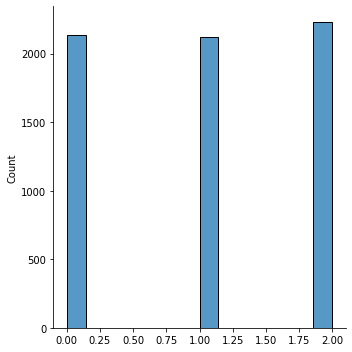

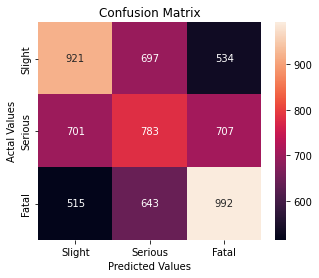

	Positive Predicitive Value - Slight: 0.43
	Positive Predicitive Value - Serious: 0.37
	Positive Predicitive Value - Fatal: 0.44

RandomForestClassifier()
	Training time: 9.114s
	Prediction time: 0.311s
	Accuarcy Score: 0.4905282612043739


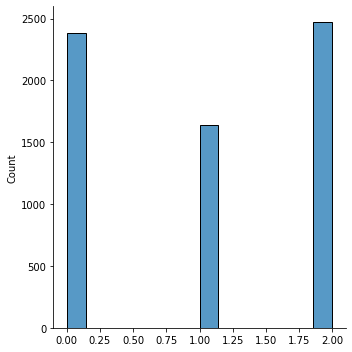

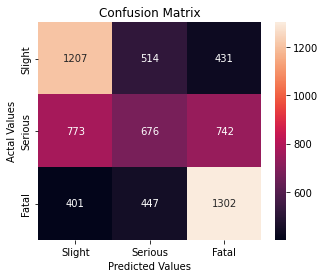

	Positive Predicitive Value - Slight: 0.51
	Positive Predicitive Value - Serious: 0.41
	Positive Predicitive Value - Fatal: 0.53

AdaBoostClassifier()
	Training time: 3.710s
	Prediction time: 0.134s
	Accuarcy Score: 0.5022331741875866


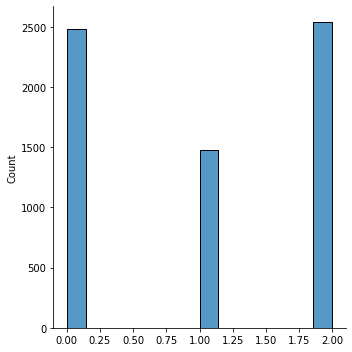

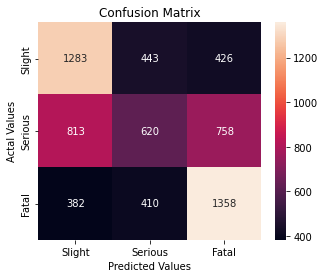

	Positive Predicitive Value - Slight: 0.52
	Positive Predicitive Value - Serious: 0.42
	Positive Predicitive Value - Fatal: 0.53

LGBMClassifier()
	Training time: 2.116s
	Prediction time: 0.083s
	Accuarcy Score: 0.5144001232096104


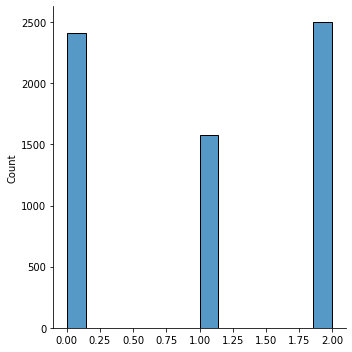

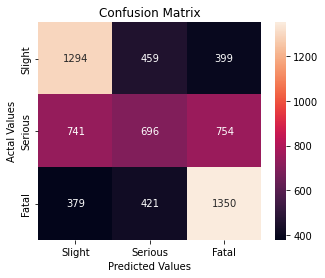

	Positive Predicitive Value - Slight: 0.54
	Positive Predicitive Value - Serious: 0.44
	Positive Predicitive Value - Fatal: 0.54

XGBClassifier(n_estimators=10, objective='multi:softprob', seed=22)
	Training time: 3.459s
	Prediction time: 0.028s
	Accuarcy Score: 0.48883412906206686


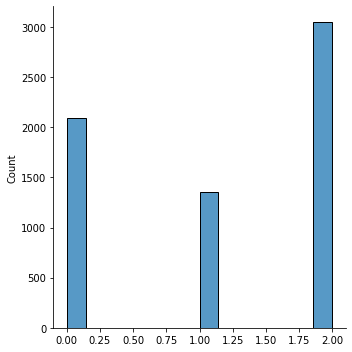

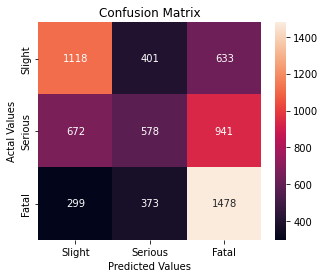

	Positive Predicitive Value - Slight: 0.54
	Positive Predicitive Value - Serious: 0.43
	Positive Predicitive Value - Fatal: 0.48

Best Model:  LGBMClassifier()
Best Accuracy:  0.5144001232096104


In [33]:
best_Accuracy = 0
best_model = ''
for model in classifiers:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    if accuracy_score(y_test, y_pred) > best_Accuracy:
        best_Accuracy = accuracy_score(y_test, y_pred)
        best_model = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))
    sns.displot(y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(matrix,
                     index = ['Slight', 'Serious', 'Fatal'], 
                     columns = ['Slight', 'Serious', 'Fatal'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
    print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
    print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=22, n_jobs=-1)
X_smote, y_smote = smote.fit_resample(X, y)

test_size = int(len(X_smote) * .15)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = test_size, random_state = 22)

DecisionTreeClassifier(class_weight='balanced')
	Training time: 148.259s
	Prediction time: 0.587s
	Accuarcy Score: 0.8654834365336724


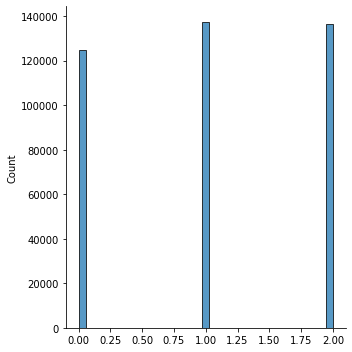

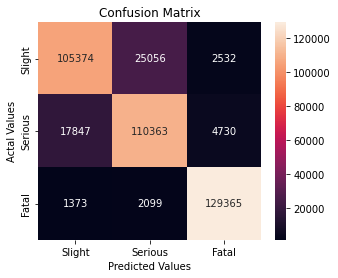

	Positive Predicitive Value - Slight: 0.85
	Positive Predicitive Value - Serious: 0.80
	Positive Predicitive Value - Fatal: 0.95



In [ ]:
best_Accuracy = 0
best_model = ''
for model in classifiers:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start
    if accuracy_score(y_test, y_pred) > best_Accuracy:
        best_Accuracy = accuracy_score(y_test, y_pred)
        best_model = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))
    sns.displot(y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(matrix,
                     index = ['Slight', 'Serious', 'Fatal'], 
                     columns = ['Slight', 'Serious', 'Fatal'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
    print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
    print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)

In [ ]:
rtc_smote = SMOTE(random_state=22, n_jobs=-1)
rtc_X_smote, rtc_y_smote = rtc_smote.fit_resample(rtc_X, rtc_y)

test_size = int(len(rtc_X_smote) * .15)
rtc_X_train, rtc_X_test, rtc_y_train, rtc_y_test = train_test_split(rtc_X_smote, rtc_y_smote, test_size = test_size, random_state = 22)

In [ ]:
best_Accuracy_rtc = 0
best_model_rtc = ''
for model in classifiers:
    start = time()
    model.fit(rtc_X_train, rtc_y_train)
    train_time = time() - start
    start = time()
    rtc_y_pred = model.predict(rtc_X_test)
    predict_time = time()-start
    if accuracy_score(rtc_y_test, rtc_y_pred) > best_Accuracy_rtc:
        best_Accuracy_rtc = accuracy_score(rtc_y_test, rtc_y_pred)
        best_model_rtc = model
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuarcy Score:", accuracy_score(rtc_y_test, rtc_y_pred))
    sns.displot(rtc_y_pred)
    matrix = confusion_matrix(rtc_y_test, rtc_y_pred)
    cm_df = pd.DataFrame(matrix,
                     index = ['Slight', 'Serious', 'Fatal'], 
                     columns = ['Slight', 'Serious', 'Fatal'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
    print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
    print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
    print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
    print()

print('Best Model: ', best_model)
print('Best Accuracy: ', best_Accuracy)

print('Best Model RTC: ', best_model_rtc)
print('Best Accuracy RTC: ', best_Accuracy_rtc)

In [ ]:
start = time()
tree = RandomForestClassifier()
tree.fit(rtc_X_train, rtc_y_train)
train_time = time() - start
start = time()
rtc_y_pred = tree.predict(rtc_X_test)
predict_time = time()-start
print(tree)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tAccuarcy Score:", accuracy_score(rtc_y_test, rtc_y_pred))
sns.displot(rtc_y_pred)
matrix = confusion_matrix(rtc_y_test, rtc_y_pred)
cm_df = pd.DataFrame(matrix,
    index = ['Slight', 'Serious', 'Fatal'], 
    columns = ['Slight', 'Serious', 'Fatal'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
print()

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(rtc_X.columns, tree.feature_importances_)

In [ ]:
start = time()
tree2 = RandomForestClassifier()
tree2.fit(X_train, y_train)
train_time = time() - start
start = time()
y_pred = tree2.predict(X_test)
predict_time = time()-start
print(tree)
print("\tTraining time: %0.3fs" % train_time)
print("\tPrediction time: %0.3fs" % predict_time)
print("\tAccuarcy Score:", accuracy_score(y_test, y_pred))
sns.displot(y_pred)
matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(matrix,
    index = ['Slight', 'Serious', 'Fatal'], 
    columns = ['Slight', 'Serious', 'Fatal'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()
print("\tPositive Predicitive Value - Slight: %0.2f" % (matrix[0][0]/(matrix[0][0] + matrix[1][0] + matrix[2][0])))
print("\tPositive Predicitive Value - Serious: %0.2f" % (matrix[1][1]/(matrix[0][1] + matrix[1][1] + matrix[2][1])))
print("\tPositive Predicitive Value - Fatal: %0.2f" % (matrix[2][2]/(matrix[0][2] + matrix[1][2] + matrix[2][2])))
print()

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(X.columns, tree2.feature_importances_)